## Learning Curve
If a model performs well on the training data but generalizes poorly according to the cross validation metrics, then the model is overfitting. If it performs poorly on both, then it is underfitting.This is one way to tell when a model is too simple or too complex.

Another way to tell is to look at the learning curves. Learning curves are plots of model's performance on the training set and the validation  set as a function of training set size.

In order generate the plots, train the model several times on different sized subsets of the training set.

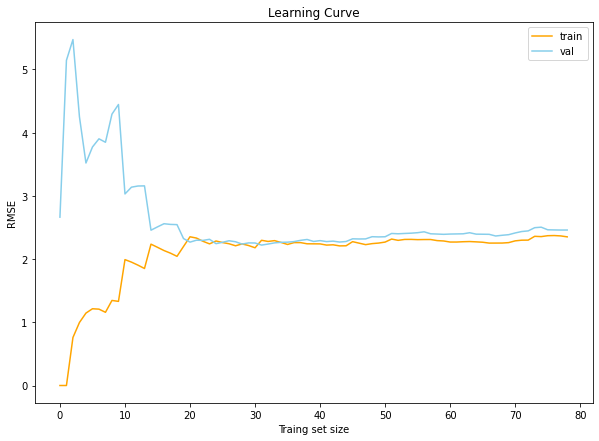

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_mse, val_mse = [], []
    for train_size in range(1, len(X_train)):
        model.fit(X_train[:train_size], y_train[:train_size])
        y_train_predict = model.predict(X_train[:train_size])
        y_val_predict = model.predict(X_val)
        train_mse.append(mean_squared_error(y_train[:train_size], y_train_predict))
        val_mse.append(mean_squared_error(y_val, y_val_predict))
    fig, ax = plt.subplots(figsize=(10,7))
    _ = ax.plot(np.sqrt(train_mse), 'orange', label='train')
    _ = ax.plot(np.sqrt(val_mse), 'skyblue', label='val')
    _ = ax.set(ylabel='RMSE', xlabel='Traing set size', title='Learning Curve')    
    ax.legend()
    
# generate training data
X = 4*np.random.rand(100, 1) - 2
y = 2 * X**2 + 2 * X + 3 + np.random.rand(100, 1)

lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)